In [1]:
from ausdex.seifa_vic.data_wrangling import wrangle_victorian_gis_data, get_aurin_datasets_vic

In [2]:
gdf_1986, gdf_1991, gdf_1996, gdf_2001 = get_aurin_datasets_vic()

In [3]:
gdf_1986.head()

id  cd_code state_  \
0  datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...  1010103      1   
1  datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...  6010406      6   
2  datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...  6010407      6   
3  datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...  3011310      3   
4  datasource-AU_Govt_ABS-UoM_AURIN_DB_3_seifa_cd...  3050708      3   

   _seifa86_population_  index_of_relative_socio_economic_disadvantage_  \
0                    36                                      1069.00290   
1                   746                                       950.94415   
2                   542                                       969.49850   
3                  1423                                      1002.39300   
4                   377                                       960.89856   

   _index_of_economic_resources_  index_of_education_and_occupation_  sla_  \
0                     1006.07980                           898.74340  300    
1                      968.09534                           895.35345  4801   
2                      910.61993                           953.03815  4801   
3                     1014.01310                           985.62335  5401   
4                      949.48320                           856.07050  6100   

             sla_name_ postal_areas_       state_name  \
0        Balranald (S)          2711  New South Wales   
1   Wynyard (M) - Pt A          7325         Tasmania   
2   Wynyard (M) - Pt A          7325         Tasmania   
3  Mulgrave (S) - Pt A          4870       Queensland   
4       Proserpine (S)          4800       Queensland   

                                            geometry  
0  MULTIPOLYGON (((144.15360 -33.97960, 144.15450...  
1  MULTIPOLYGON (((145.71700 -40.98920, 145.71090...  
2  MULTIPOLYGON (((145.72330 -40.99050, 145.71930...  
3  MULTIPOLYGON (((145.74150 -16.96720, 145.74750...  
4  MULTIPOLYGON (((148.67320 -20.44520, 148.67340...

In [4]:
suburbs, councils = wrangle_victorian_gis_data()

In [5]:
import geopandas as gpd

gdf_combined = gpd.overlay(suburbs.to_crs('EPSG:4326'), gdf_1986.to_crs('EPSG:4326'))

In [6]:
gdf_combined.columns

Index(['id_1', 'lc_ply_pid', 'dt_create', 'dt_retire', 'loc_pid', 'vic_locali',
       'vic_loca_1', 'vic_loca_2', 'vic_loca_3', 'vic_loca_4', 'vic_loca_5',
       'vic_loca_6', 'vic_loca_7', 'Site_suburb', 'id_2', 'cd_code', 'state_',
       '_seifa86_population_',
       'index_of_relative_socio_economic_disadvantage_',
       '_index_of_economic_resources_', 'index_of_education_and_occupation_',
       'sla_', 'sla_name_', 'postal_areas_', 'state_name', 'geometry'],
      dtype='object')

Text(0.5, 15.0, 'decimal degrees longitude')

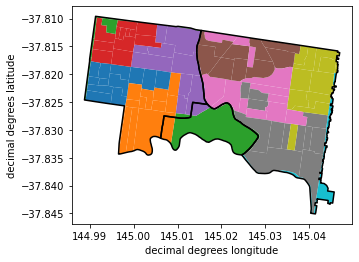

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

gdf_combined[(gdf_combined['Site_suburb']=='BURNLEY') |(gdf_combined['Site_suburb']=='RICHMOND')|(gdf_combined['Site_suburb']=='HAWTHORN')].plot('cd_code', ax=ax)
suburbs[(suburbs['Site_suburb']=='BURNLEY') |(suburbs['Site_suburb']=='RICHMOND')|(suburbs['Site_suburb']=='HAWTHORN')].boundary.plot(color='black', ax=ax)
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_ylabel('decimal degrees latitude')
ax.set_xlabel('decimal degrees longitude')

In [8]:
fig.savefig('paper_output.pdf')

In [44]:
from ausdex.seifa_vic import get_seifa_map
fig_map = get_seifa_map('12-12-2015', 'ier_score', fill_value='extrapolate', simplify= 0.01)

In [49]:
fig_map.update_layout(  yaxis=dict(
        range=[-43, -10]
    ),
    xaxis=dict(
        range=[110, 160],
        domain = [0,1]
    ),
    width = 1400,
    height = 800,
    margin=dict(pad = 0,
               l=0,
               r=40,
               b=20),
    coloraxis_colorbar_x = 0.7,
    title_text = ''
                    
)

In [47]:
fig_map.write_image('vic_map2.pdf')

In [4]:
?fig_map.to_image

In [18]:
gdf_1986.bounds['minx'].min(), gdf_1986.bounds['miny'].min(),gdf_1986.bounds['maxx'].max(), gdf_1986.bounds['maxy'].max()



(112.9166, -43.661, 159.1056, -9.1173)

In [17]:
gdf_1986.bounds

minx     miny      maxx     maxy
0      144.0986 -34.2529  144.6878 -33.6580
1      145.6995 -40.9977  145.7202 -40.9790
2      145.7046 -41.0050  145.7379 -40.9828
3      145.7351 -16.9678  145.7478 -16.9562
4      148.3295 -20.6008  148.7159 -20.3560
...         ...      ...       ...      ...
29613  151.2380 -33.8840  151.2425 -33.8807
29614  151.2361 -33.8694  151.2392 -33.8679
29615  151.2274 -33.8848  151.2299 -33.8836
29616  151.2292 -33.8871  151.2326 -33.8845
29617  151.2274 -33.8899  151.2320 -33.8884

[29618 rows x 4 columns]